In [1]:
from IPython.display import Image
Image(url= "titanic-disaster.jpg")

# https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg

Looking at the picture above, It was mentioned in theory that the first impact of the Ice berg hit was on the Third class comaprtment of the ship, causing a likelyhood of 3rd class passengers to drown first. I will be doing my analysis with this in mind.


# Import libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Load Data

In [3]:
test_data = pd.read_csv('dataset/test.csv')
train_data = pd.read_csv('dataset/train.csv')

dummie_train = pd.get_dummies(train_data, columns = ['Sex','Embarked'], drop_first = True)
dummi_test = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'], drop_first= True)

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          417 non-null float64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 42.5+ KB


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
#to check missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Plot Barchats & Grids To See Data Story

In [7]:
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index =['Survived','Dead']
    df.plot(kind='bar', stacked = False, figsize=(10,5))

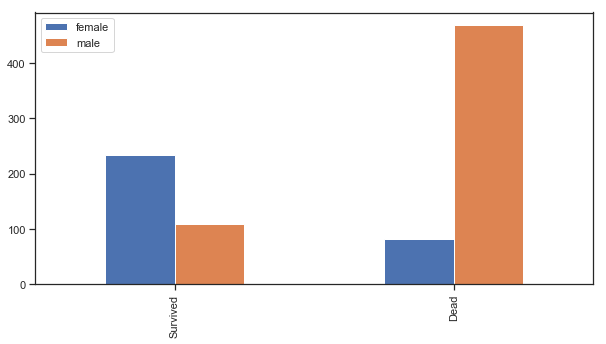

In [8]:
bar_chart('Sex')

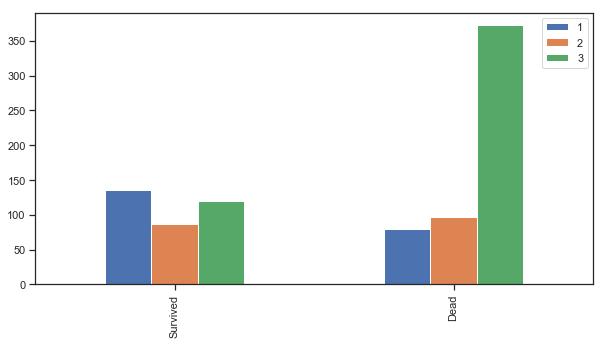

In [9]:
bar_chart('Pclass')

In [10]:
train_test_data = [train_data, test_data] #combining test and train data sets

In [11]:
#restructuring the name column

for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract ('([A-Za-z]+)\.', expand = False)

In [12]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Mme           1
Capt          1
Don           1
Lady          1
Sir           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [13]:
#I am only going to use mr,mrs,

title_mapping = {'Mr':0,'Miss':1, 'Mrs':2, 'Master':3,'Dr':3,'Rev':3, 'Col':3,'Major':3, 'Mlle':3,'Lady':3,'Capt':3,'Sir':3,'Don':3,'Countess':3,'Mme':3,'JohnKheer':3,'Ms':3}

for dataset in train_test_data:
    dataset['Title']= dataset['Title'].map(title_mapping)

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [93]:
#Because some values of the age are missing ,I will fill in the values using the median age of each title(Mr, Mrs, Miss, Others)

train_data['Age'].fillna(train_data.groupby ('Title')['Age'].transform('median'), inplace= True)
test_data['Age'].fillna(test_data.groupby ('Title')['Age'].transform('median'), inplace= True)

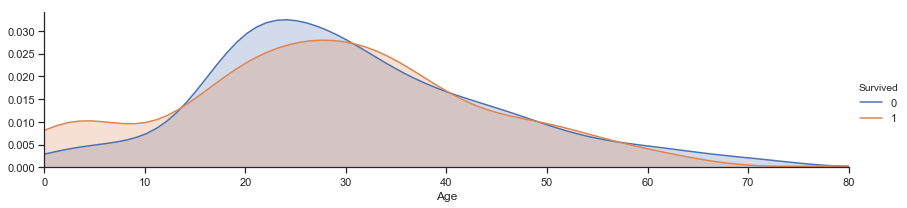

In [16]:
# creating a grid chart to show the relationship between age and survived using Seaborn
grid = sns.FacetGrid(train_data, hue = 'Survived', aspect = 4)
grid.map(sns.kdeplot,'Age', shade = True)
grid.set(xlim= (0, train_data['Age'].max()))
grid.add_legend()

In [17]:
#Sex mapping for female = 0 , male =1
sex_mapping = {'female':0, 'male':1}
for dataset in train_test_data:
    dataset['Sex']= dataset ['Sex'].map(sex_mapping)

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0


In [19]:
#Combining Sibling and parent count into one column called FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']+1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']+1

(0, 11.0)

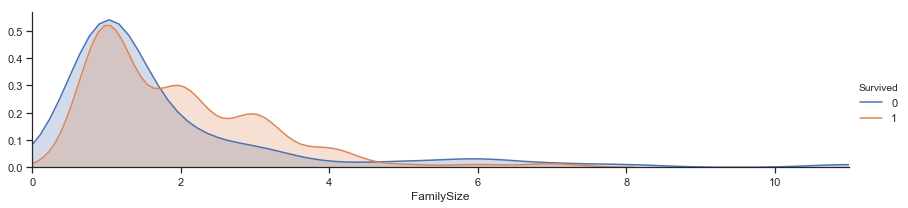

In [21]:
# creating a grid chart to show the relationship between family Size and Survived using Seaborn
facet = sns.FacetGrid(train_data, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim = (0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [22]:
family_mapping = {1:0, 2:0.1, 3:0.2, 4:0.3, 5:0.4, 6:0.5, 7:0.6, 8:0.7,9:0.8, 10:0.9, 11:1}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [23]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2.0,0.1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2.0,0.1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,3.0,0.4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,2.0,0.2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,2.0,0.1


In [101]:
col_drop = ['SibSp','Parch','Ticket', 'Name']
train_data = train_data.drop(col_drop, axis =1)
test_data = test_data.drop(col_drop, axis = 1)

In [102]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,22.0,7.2500,NaN,S,0.0,0.1
1,2,1,1,0,38.0,71.2833,C85,C,2.0,0.1
2,3,1,3,0,26.0,7.9250,NaN,S,1.0,0.0
3,4,1,1,0,35.0,53.1000,C123,S,2.0,0.1
4,5,0,3,1,35.0,8.0500,NaN,S,0.0,0.0


In [103]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,34.5,7.8292,NaN,Q,0.0,0.0
1,893,3,0,47.0,7.0000,NaN,S,2.0,0.1
2,894,2,1,62.0,9.6875,NaN,Q,0.0,0.0
3,895,3,1,27.0,8.6625,NaN,S,0.0,0.0
4,896,3,0,22.0,12.2875,NaN,S,2.0,0.2


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          890 non-null float64
FamilySize     891 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.7+ KB


In [105]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,22.0,7.2500,NaN,S,0.0,0.1
1,2,1,1,0,38.0,71.2833,C85,C,2.0,0.1
2,3,1,3,0,26.0,7.9250,NaN,S,1.0,0.0
3,4,1,1,0,35.0,53.1000,C123,S,2.0,0.1
4,5,0,3,1,35.0,8.0500,NaN,S,0.0,0.0


# Modelling using XGB gradient boosting algorithim

In [25]:


train_features = ['Pclass','Age','Sex','Fare','Title', 'FamilySize']
test_features = ['Pclass','Age','Sex','Fare', 'Title', 'FamilySize']

train_X = train_data[train_features]
train_y = train_data.Survived

test_y = test_data[test_features]

model = XGBClassifier (learning_rate= 0.1)

model.fit(train_X,train_y)
prediction = model.predict(test_y)

Id = test_data['PassengerId']


my_submission = pd.DataFrame({'PassengerId':Id, 'Survived': prediction})
my_submission.to_csv('submission.csv', index=False)

print(my_submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3